# Confronto tra algoritmi di ordinamento
> Andrea Delli (matricola 7052940)
>
> Università degli studi di Firenze
>
> Laboratorio di Algoritmi (B024261), Esercizio B

# Introduzione
Lo scopo di questo Notebook è quello di confrontare le prestazioni di due algoritmi di ordinamento: **Insertion Sort** e **Counting Sort**.

Per semplicità, si suppone che le liste da ordinare contengano dei valori numerici interi, anche se gli algoritmi di ordinamento considerati possono essere applicati a qualsiasi dato ordinabile (ad esempio stringhe o date). 

Il Notebook è composto da:
- Introduzione
    - Librerie utilizzate
- Cenni teorici
    - Spiegazione degli algoritmi
    - Prestazioni attese degli algoritmi analizzati
    - Implementazione degli algoritmi
- Descrizione dei test effettuati
- Generazione dei dati di test
- Esecuzione dei test
- Generazione di grafici
- Tabelle dei tempi di esecuzione
- Osservazioni sui risultati ottenuti

### Librerie utilizzate
In questo notebook sono stati utilizzati i seguenti moduli Python, che verranno automaticamente installati eseguendo il blocco seguente a questo.
- `numpy` $\implies$ generazione di array con valori casuali (funzione `numpy.random.randint()`)
- `matplotlib` $\implies$ generazione dei grafici e delle tabelle, per analizzare visivamente le prestazioni dei due algoritmi (funzioni `matplotlib.pyplot.plot()` e `matplotlib.pyplot.table()`)
- `scipy` $\implies$ rappresentazione migliore dei grafici, per inserire curve che rappresentano l'andamento previsto dei dati (funzione `scipy.interpolate.interp1d()`)

In [1]:
!pip install numpy --user --quiet
!pip install matplotlib --user --quiet
!pip install scipy --user --quiet

# Cenni Teorici

## Problema dell'ordinamento
Data una sequenza di $n$ numeri $A = \{a_1, ..., a_n\}$,
il problema dell'ordinamento ha come obiettivo quello di trovare una permutazione $A' = \{a'_1, ..., a'_n\}$ di $A$
tale che $a'_1 \le a'_2 \le ... \le a'_n$.

## Insertion Sort
L'Insertion Sort è un algoritmo di ordinamento che funziona considerando un elemento dell'array alla volta, spostando gli elementi più grandi alla sua destra e lasciando gli elementi più piccoli alla sua sinistra.

Gli elementi vengono ordinati partendo dall'inizio dell'array.

Ogni elemento viene spostato a sinistra finché non viene trovato un elemento più piccolo di esso. In questo modo, i valori più grandi dell'elemento considerato saranno alla sua destra, mentre quelli più piccoli alla sua sinistra.

|![Prima dell'iterazione](https://upload.wikimedia.org/wikipedia/commons/3/32/Insertionsort-before.png "(Fig.1) Prima dell'iterazione")|
|:--:|
| *(Fig.1) Prima dell'iterazione* |

|![Dopo l'iterazione](https://upload.wikimedia.org/wikipedia/commons/d/d9/Insertionsort-after.png "(Fig.2) Dopo l'iterazione")|
|:--:|
| *(Fig.2) Dopo l'iterazione* |

È importante inoltre notare che all'i-esima iterazione, i primi $i-1$ elementi sono già ordinati tra loro.

Inoltre, l'insertion sort è un algoritmo che **ordina sul posto**, ossia che non necessita di memoria aggiuntiva per l'ordinamento.

### Complessità
Questo algoritmo di ordinamento ha una complessità di $O(n^2)$ nel caso peggiore (lista ordinata inversamente) e di $\Omega(n)$ nel caso migliore (lista già ordinata). Nel caso medio il costo è comunque quadratico.

| Caso peggiore | Caso medio | Caso migliore |
|:--:|:--:|:--:|
| $O(n^2)$ |$O(n^2)$|$\Omega(n)$|

Queste caratteristiche fanno sì che l'Insertion Sort non sia un algoritmo particolarmente efficiente, anche se rimane una buona soluzione con piccole quantità di dati da ordinare.

### Correttezza
L'Insertion Sort è un algoritmo corretto, ossia termina con l'output giusto per ogni possibile istanza in input.

Essendo un algoritmo iterativo, la sua correttezza può essere dimostrata tramite una invariante di ciclo.

### Stabilità

L'Insertion Sort è un algoritmo stabile, ossia chiavi con lo stesso valore appariranno in uscita con lo stesso ordine di quello che avevano in ingresso all'algoritmo.

### Esempi
|![Esempio grafico Insertion Sort](https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif "Esempio grafico Insertion Sort")|
|:--:|
| *(Fig.3) Esempio grafico Insertion Sort* |

|![Animazione Insertion Sort](https://upload.wikimedia.org/wikipedia/commons/4/42/Insertion_sort.gif "Animazione Insertion Sort")|
|:--:|
| *(Fig.4) Animazione dell'Insertion Sort* |

In [2]:
# Implementazione dell'Insertion Sort
def insertion_sort(A: list):
    for j in range(1,len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = key

## Counting Sort
Il Counting Sort è un algoritmo di ordinamento che ordina gli elementi di un array in base alla loro frequenza.

Passi dell'algoritmo:
1. Contare il numero di occorrenze per ogni possibile valore che può essere contenuto nell'array
2. Calcolare quanti numeri sono minori dell'i-esimo valore (aggiornando la lista delle frequenze costruita al punto 1)
3. Utilizzare la lista costruita per inserire in un nuovo array i valori nell'ordine corretto

Sarà quindi necessario utilizzare della **memoria aggiuntiva** per tenere traccia delle frequenze dei valori e del risultato finale.

L'array risultante verrà riempito da sinistra verso destra in maniera incrementale.

Per semplicità, si suppone che i dati da ordinare siano interi maggiori o uguali a zero.

### Complessità
La complessità del Counting Sort dipende dalla quantità di valori che è possibile inserire nell'array da ordinare.

Il costo dell'algoritmo è $O(n + k)$, in cui $n$ è il numero di elementi nella lista da ordinare e $k$ è il numero di valori che è possibile inserire nella lista (ad esempio valori da 1 a $k$).

### Correttezza
Anche il Counting Sort, come l'Insertion Sort, è un algoritmo di ordinamento corretto. Essendo un algoritmo iterativo, anche in questo caso è possibile dimostrare la correttezza tramite invarianti di ciclo.

### Stabilità
Anche il Counting Sort è un algoritmo stabile, dovuto a come è definito l'ultimo ciclo dell'algoritmo.

Questa caratteristica lo rende molto utile in algoritmi di ordinamento più complessi, ad esempio il Radix Sort.

In [3]:
# Implementazione del Counting Sort
def counting_sort(A: list):
    max_val = max(A)
    counts = [0] * (max_val + 1)    # Crea un array di conteggio con un elemento per ogni valore possibile

    # Conta il numero di occorrenze di ciascun elemento nell'array
    for num in A:
        counts[num] += 1

    # Conta il numero di elementi minori o uguali a i
    for i in range(1, max_val + 1):
        counts[i] += counts[i - 1]

    # Crea l'array ordinato
    B = [0] * len(A)
    for num in A:
        B[counts[num] - 1] = num
        counts[num] -= 1
    return B

# Descrizione dei test

Per testare gli algoritmi di ordinamento sarà necessario generare una lista di $n$ valori interi, e misurare il tempo di esecuzione di entrambi gli algoritmi.

Per testare al meglio l'Insertion Sort, verranno generati anche i dati relativi al caso migliore (dati già ordinati) e al caso peggiore (dati ordinati inversamente). Questi particolari dati non hanno invece influenza sulle prestazioni del Counting Sort, in quanto la sua complessità rimane la stessa in tutti i casi.

Verranno eseguiti i test di ordinamento di $n$ valori, con $n$ che va da 1 a 100.000.

Per ognuno di questi test, si eseguiranno più prove, generando diversi input, e verrà calcolato il valore medio di ogni gruppo di prove.

## Generazione dei dati di test
Le seguenti funzioni generano un array con $n$ valori al loro interno.

La prima funzione, `random_array(n)`, riceve in input un intero $n$ e genera un array con $n$ interi random al suo interno.
I dati generati hanno un range che varia tra 0 e `max_value`.

Le funzioni `sorted_array(n)` e `reversed_array(n)` invece hanno il compito di generare un array di $n$ elementi, rispettivamente ordinati in modo crescente e decrescente.

In [4]:
import numpy as np

max_value = 100  # Valore massimo inserito nell'array

# Array con numeri random
def random_array(n):
    return np.random.randint(0, max_value + 1, n).tolist()

# Array ordinato (valori crescenti)
def sorted_array(n):
    return list(range(n)) # From 0 to n-1

# Array ordinato inversamente (valori decrescenti)
def reversed_array(n):
    return list(range(n-1, -1, -1)) # From n-1 to 0

## Esecuzione dei test
Il numero totale d'iterazioni è $n$, parametro definito nello script sottostante.

All'$i$-esima iterazione viene generato un array di un array con $i$ elementi, che verranno ordinati utilizzando i due algoritmi da confrontare.
    
Il tempo di esecuzione di una funzione è misurato utilizzando il modulo `timeit`, tramite la funzione `timeit.timeit()`.
Ogni per avere un valore più accurato della misura, l'ordinamento è eseguito un numero di volte pari a `tests_per_iteration`, e poi ne viene calcolata la media.

È importante notare che prima si esegue l'algoritmo Counting Sort sull'array, e poi l'Insertion Sort.
Questo è dovuto al fatto che il Counting Sort ritorna un nuovo array con gli elementi ordinati, lasciando invariato l'array iniziale, mentre l'Insertion Sort ordina sul posto, modificando l'array originale.
Se l'ordine delle chiamate fosse invertito, l'Insertion Sort ordinerebbe l'array generato sul posto e il Counting Sort riceverebbe sempre un array ordinato.

In [5]:
import timeit

n = 5000
step = 200
tests_per_iteration = 200

insertionsort_average = []
countingsort_average = []

insertionsort_best = []
countingsort_best = []

insertionsort_worst = []
countingsort_worst = []

def measure_time(function, args):
    """ Ritorna il tempo di esecuzione medio (in millisecondi) della funzione data, eseguita `test_per_iteration` volte """
    return timeit.timeit(stmt=lambda: function(args), number=tests_per_iteration) / tests_per_iteration * 1000

# Caso medio
for i in range(1, n, step):
    arr = random_array(i)
    countingsort_average.append(measure_time(counting_sort, arr))   # Test counting sort
    insertionsort_average.append(measure_time(insertion_sort, arr)) # Test insertion sort

# Elementi gia' ordinati
for i in range(1, n, step):
    arr = sorted_array(i)
    countingsort_best.append(measure_time(counting_sort, arr))   # Test counting sort
    insertionsort_best.append(measure_time(insertion_sort, arr)) # Test insertion sort

# Elementi ordinati inversamente
for i in range(1, n, step):
    arr = reversed_array(i)
    countingsort_worst.append(measure_time(counting_sort, arr))   # Test counting sort
    insertionsort_worst.append(measure_time(insertion_sort, arr)) # Test insertion sort

print("Completato!")

Completato!


# Generazione di grafici
La generazione dei grafici è stata effettuata tramite il modulo `matplotlib`.
Le tre coppie di grafici mostrati mettono a confronto i tempi di esecuzione dei due algoritmi, dipendentemente dalla lunghezza dell'array.

I valori disegnati graficamente fanno riferimento rispettivamente al caso medio (valori random), al caso migliore (valori già ordinati) e al caso peggiore (valori ordinati inversamente).

In [20]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def draw_approximation(plot, x, y, degree, label):
    coefficients = np.polyfit(x, y, degree)
    new_x = np.linspace(1, n, n)
    new_y = np.polyval(coefficients, new_x)
    plot.plot(new_x, new_y, '--', label=label)

def draw_plots(left_data, right_data, plot_title: str = None, smooth = False):
    x = np.linspace(1, n, len(left_data))
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))
    
    if smooth:
        # Crea la funzione d'interpolazione & genera i valori della curva smooth
        x_smooth = np.linspace(1, n, n)
        left_data = interp1d(x, left_data, kind='cubic')(x_smooth)
        right_data = interp1d(x, right_data, kind='cubic')(x_smooth)
        x = x_smooth
    
    # Insertion Sort plot a sinistra
    left.plot(x, left_data)
    left.set_title('Insertion Sort')
    left.set_xlabel('Dimensione della lista (n)')
    left.set_ylabel('Tempo di esecuzione (in ms)')

    draw_approximation(left, x, left_data, 2, label='Interpolazione polinomiale') # Aggiungo l'approssimazione polinomiale
    left.legend()

    # Counting Sort plot a destra
    right.plot(x, right_data)
    right.set_title('Counting Sort')
    right.set_xlabel('Dimensione della lista (n)')
    right.set_ylabel('Tempo di esecuzione (in ms)')

    draw_approximation(right, x, right_data, 1, label='Retta di regressione') # Aggiungo l'approssimazione polinomiale
    right.legend()
    if plot_title:
        fig.suptitle(plot_title, fontsize=16)

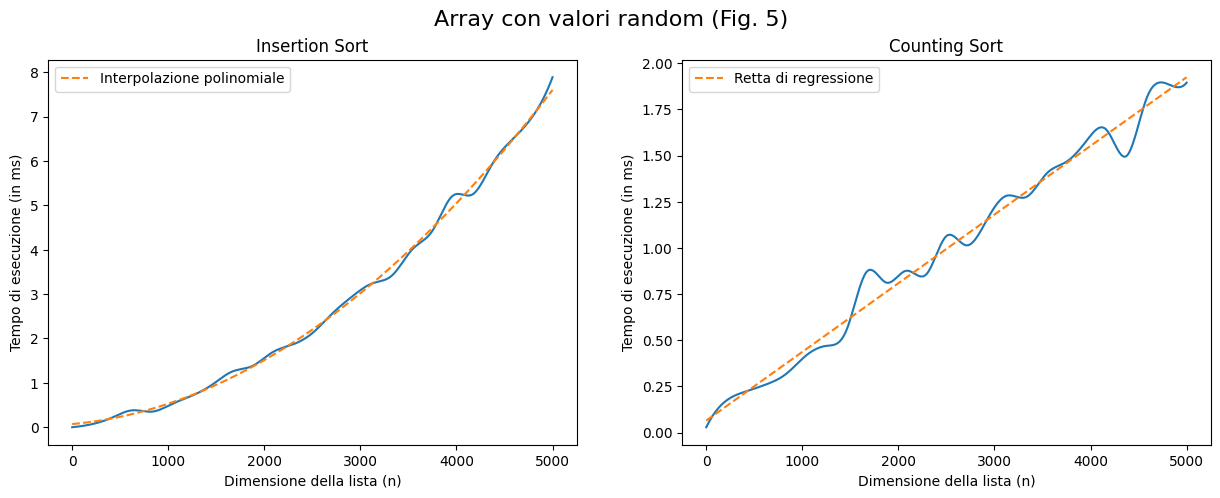

In [23]:
draw_plots(insertionsort_average, countingsort_average, "Array con valori random (Fig. 5)", smooth=True)

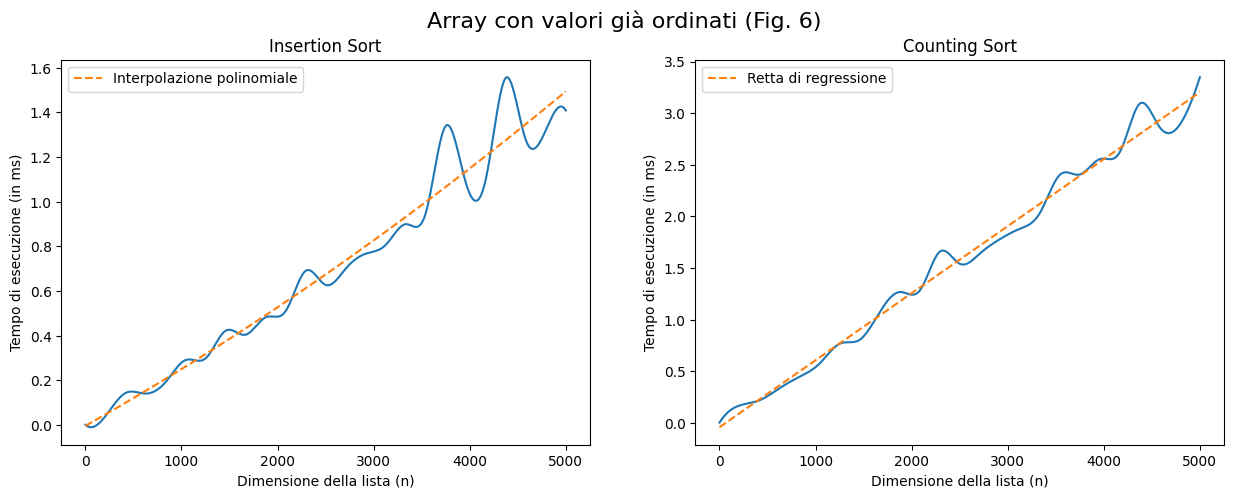

In [24]:
draw_plots(insertionsort_best, countingsort_best, "Array con valori già ordinati (Fig. 6)", smooth=True)

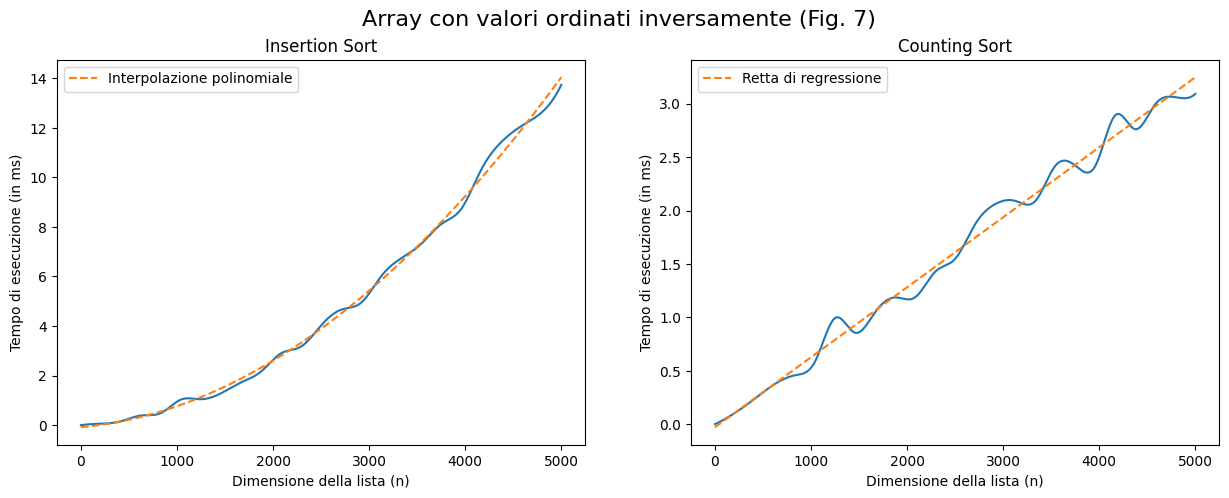

In [25]:
draw_plots(insertionsort_worst, countingsort_worst, "Array con valori ordinati inversamente (Fig. 7)", smooth=True)

## Tabelle dei tempi di esecuzione
Le seguenti tabelle mostrano i tempi di esecuzione dei due algoritmi, nei 3 casi considerati, al crescere della quantità dei valori da ordinare.

Le tabelle sono state create utilizzando la libreria `numpy`, tramite il metodo `numpy.pyplot.table`.

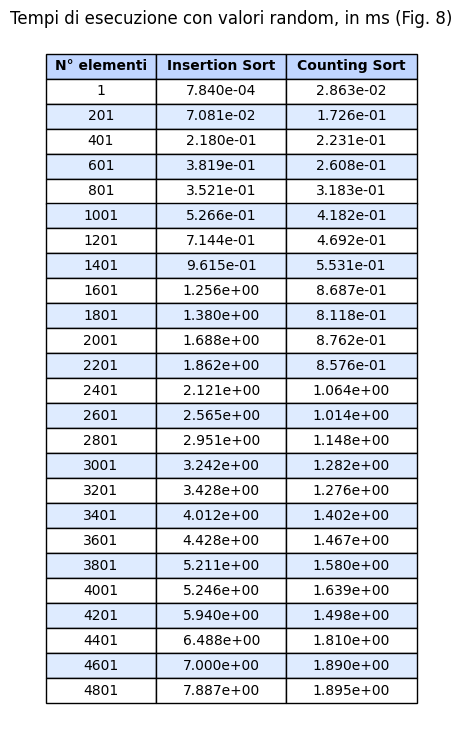

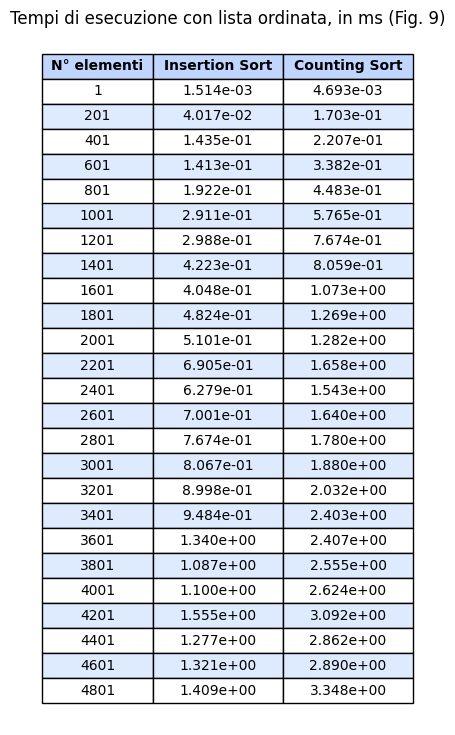

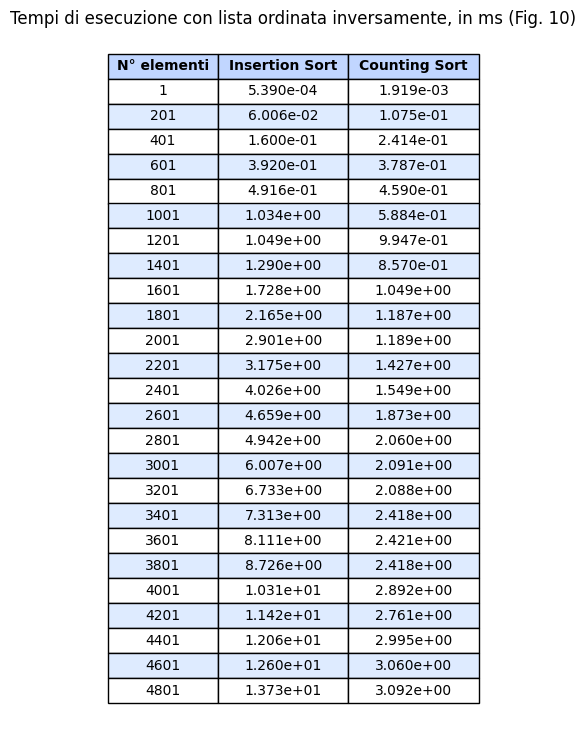

In [16]:
def draw_table_data(columns: list, headers: tuple, title: str):
    fig, ax = plt.subplots(figsize=(5, 9))
    plt.title(title)

    data = np.stack(tuple(columns), axis=1) # Unisci liste come colonne

    # Stile della tabella
    ax.axis('off')
    table = ax.table(cellText=data, colLabels=headers, loc='center', cellLoc='center')
    table.auto_set_column_width(col=list(range(len(columns))))
    table.scale(1, 1.5)

    for cell in table._cells:
        if table[cell].get_text().get_text() in headers:
            table[cell].set_facecolor("#c1d6ff")
            table[cell].set_text_props(weight='bold')
        elif cell[0] % 2 == 0: # Colora righe pari
            table[cell].set_facecolor("#deebff")
    plt.show()

    
draw_table_data([[i for i in range(1, n, step)],
                ["{:.3e}".format(val) for val in insertionsort_average],
                ["{:.3e}".format(val) for val in countingsort_average]],
               ("N° elementi", "Insertion Sort", "Counting Sort"),
               "Tempi di esecuzione con valori random, in ms (Fig. 8)")

draw_table_data([[i for i in range(1, n, step)],
                ["{:.3e}".format(val) for val in insertionsort_best],
                ["{:.3e}".format(val) for val in countingsort_best]],
               ("N° elementi", "Insertion Sort", "Counting Sort"),
               "Tempi di esecuzione con lista ordinata, in ms (Fig. 9)")

draw_table_data([[i for i in range(1, n, step)],
                ["{:.3e}".format(val) for val in insertionsort_worst],
                ["{:.3e}".format(val) for val in countingsort_worst]],
               ("N° elementi", "Insertion Sort", "Counting Sort"),
               "Tempi di esecuzione con lista ordinata inversamente, in ms (Fig. 10)")

# Osservazioni

I grafici ottenuti mostrano chiaramente come i due algoritmi si comportano al variare della quantità dei dati da ordinare e dalla loro natura, dal punto di vista della complessità temporale.

### Valori randomici (caso medio)

Nel caso di ordinamento di una lista composta da valori random, il grafico delle prestazioni dell'Insertion Sort mostra chiaramente un andamento simile a $n^2$ (parabola rappresentata in arancione in Fig. 5), come previsto dallo studio della complessità. Il Counting Sort ha invece un comportamento lineare.

Questo ha impatto anche sui tempi di esecuzione, come è possibile vedere nella tabella in Fig. 8 riportata in precedenza. Al crescere dei dati, le prestazioni del Counting Sort sono decisamente migliori rispetto a quelle dell'Insertion Sort.

Si nota però che quando i dati da ordinare sono pochi l'Insertion Sort ha performance migliori rispetto al Counting Sort.

### Valori già ordinati (caso migliore)

Il caso migliore dell'Insertion Sort è quando i dati sono già ordinati.
In questo caso, la sua complessità è lineare, come è possibile osservare dal grafico a sinistra in Fig. 6.
Questo conferma le ipotesi teoriche fatte all'inizio, in cui è stato affermato che la complessità nel caso migliore è di $\Omega(n)$. L'interpolazione polinomiale tramite un polinomio di grado 2, rappresentata in arancione in Fig. 6, mostra chiaramente che l'andamento della curva è lineare, e non quadratico.

Il Counting Sort invece continua ad avere un andamento lineare, come previsto dai cenni teorici.

Inoltre, osservando la tabella in Fig. 9, si vede che i tempi di esecuzione dell'Insertion Sort rispetto a quelli del Counting Sort sono inferiori, nonostante entrambi abbiano un comportamento lineare. Questo è dovuto al fatto che l'Insertion Sort è un algoritmo molto più semplice del Counting Sort. Infatti l'Insertion Sort ha un solo ciclo esterno, mentre il Counting Sort ha più cicli esterni e quindi deve eseguire più operazioni con costo lineare.

### Valori ordinati inversamente (caso peggiore)

Il caso peggiore dell'Insertion Sort è quando i dati sono ordinati inversamente.
La sua complessità in questo caso è quadratica, come confermato dal grafico a sinistra in Fig. 7, in cui si confrontano i tempi di esecuzione dell'Insertion Sort (in blu) e l'interpolazione tramite un polinomio di grado 2 (parabola).

Tramite l'asse $y$ nei grafici in Fig. 5 e Fig. 7, e le tabelle in Fig. 8 e Fig. 10, è possibile osservare inoltre che i tempi di esecuzione rispetto al caso medio sono peggiori, a parità della quantità dei valori da ordinare.

Il Counting Sort invece continua ad avere complessità lineare, con tempi di esecuzione molto simili al caso migliore.

### Osservazioni su Insertion Sort

La complessità teorica dell'Insertion Sort rispetta le misurazioni effettuate nella pratica.
Nel caso migliore la sua complessità è effettivamente lineare, mentre nel caso medio e nel caso peggiore la complessità diventa quadratica.

### Osservazioni sul Counting Sort

Come previsto, la complessità del Counting Sort rimane lineare a prescindere dai dati che riceve in ingresso.

È infine possibile osservare che quando l'array è già ordinato (in modo crescente o decrescente), le prestazioni del Counting Sort sono peggiori rispetto a quando i valori sono random.
È possibile osservare questo fenomeno sia tramite l'asse verticale dei grafici (Fig. 5, Fig. 6, Fig. 7) che tramite i valori dei tempi di esecuzione riportati in tabella (Fig. 8, Fig. 9, Fig. 10).

Questo è dovuto al fatto che quando i dati sono ordinati, questi vanno da $1$ a $n$, (e viceversa) e non ci sono valori ripetuti, mentre nel medio i valori vanno da $1$ a `max_value`, quindi quando la lunghezza della lista è maggiore di `max_value` sicuramente avremo valori ripetuti, e questo migliora la performance del Counting Sort, in quanto la sua complessità è $O(n+k)$ e dipende anche dal range dei dati all'interno della lista.

### Bibliografia
Fig.1, Fig.2, Fig.3, Fig.4: [Insertion Sort - Wikipedia](https://en.wikipedia.org/wiki/Insertion_sort)